In [1]:
import numpy as np
import dimod
import matplotlib as mpl
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import math
import cmath
%matplotlib inline

This notebook takes a "response", i.e., an output from quantum or simulated annealing using dimod or a DWaveSampler, and then performs a Fourier transform on this imput. Currently, only a 16 bit response is supported.

Creating an array of r vectors for a 4x4 lattice of the form:

In [2]:
# r0  r1  r2  r3 
# r4  r5  r6  r7
# r8  r9  r10 r11
# r12 r13 r14 r15

r_vectors=np.array([
    tuple([0,3]), tuple([1,3]), tuple([2,3]), tuple([3,3]),
    tuple([0,2]), tuple([1,2]), tuple([2,2]), tuple([3,2]),
    tuple([0,1]), tuple([1,1]), tuple([2,1]), tuple([3,1]),
    tuple([0,0]), tuple([1,0]), tuple([2,0]), tuple([3,0]),
])
print(r_vectors)

[[0 3]
 [1 3]
 [2 3]
 [3 3]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [0 0]
 [1 0]
 [2 0]
 [3 0]]


Creating an array of k vectors for a 4x4 lattice:

In [3]:
k_vectors=np.array([
    tuple([0,np.pi*(2/3)]), tuple([np.pi*2,np.pi*(2/3)]), tuple([np.pi,np.pi*(2/3)]), tuple([np.pi*(2/3),np.pi*(2/3)]),
    tuple([0,np.pi]), tuple([np.pi*2,np.pi]), tuple([np.pi,np.pi]), tuple([np.pi*(2/3),np.pi]),
    tuple([0,np.pi*2]), tuple([np.pi*2,np.pi*2]), tuple([np.pi,np.pi*2]), tuple([np.pi*(2/3),np.pi*2]),
    tuple([0,0]), tuple([np.pi*2,0]), tuple([np.pi,0]), tuple([np.pi*(2/3),0]),
])
print(k_vectors)

[[0.         2.0943951 ]
 [6.28318531 2.0943951 ]
 [3.14159265 2.0943951 ]
 [2.0943951  2.0943951 ]
 [0.         3.14159265]
 [6.28318531 3.14159265]
 [3.14159265 3.14159265]
 [2.0943951  3.14159265]
 [0.         6.28318531]
 [6.28318531 6.28318531]
 [3.14159265 6.28318531]
 [2.0943951  6.28318531]
 [0.         0.        ]
 [6.28318531 0.        ]
 [3.14159265 0.        ]
 [2.0943951  0.        ]]


The following cells compute all exp(i*k.r) values

In [4]:
# making a list of k.ri for all values of k; 16x16=256 values 
# output takes the form:
# [[k0.r1,k0.r2,...k0.r15],[k1.r0,k1.r1,...k1.r15],...[k15.r0,k15.r1,...,k15.r15]]
kdotri=[]
for ki in range(16):
    newlist=[]
    for ri in range(16):
        val=k_vectors[ki][0]*r_vectors[ri][0] + k_vectors[ki][1]*r_vectors[ri][1]
        newlist.append(val)
    kdotri.append(newlist)
print(kdotri)

[[6.283185307179586, 6.283185307179586, 6.283185307179586, 6.283185307179586, 4.1887902047863905, 4.1887902047863905, 4.1887902047863905, 4.1887902047863905, 2.0943951023931953, 2.0943951023931953, 2.0943951023931953, 2.0943951023931953, 0.0, 0.0, 0.0, 0.0], [6.283185307179586, 12.566370614359172, 18.84955592153876, 25.132741228718345, 4.1887902047863905, 10.471975511965976, 16.755160819145562, 23.03834612632515, 2.0943951023931953, 8.377580409572781, 14.660765716752367, 20.943951023931955, 0.0, 6.283185307179586, 12.566370614359172, 18.84955592153876], [6.283185307179586, 9.42477796076938, 12.566370614359172, 15.707963267948966, 4.1887902047863905, 7.330382858376184, 10.471975511965976, 13.613568165555769, 2.0943951023931953, 5.235987755982988, 8.377580409572781, 11.519173063162574, 0.0, 3.141592653589793, 6.283185307179586, 9.42477796076938], [6.283185307179586, 8.377580409572781, 10.471975511965976, 12.566370614359172, 4.1887902047863905, 6.283185307179586, 8.377580409572781, 10.471

In [5]:
# doing e^(i*k.r) for each element in kdotri
import cmath
expkdotri=[]
for i in range(16):
    newlist=[]
    for j in range(16):
        val=cmath.exp(complex(0,kdotri[i][j]))
        newlist.append(val)
    expkdotri.append(newlist)
print(expkdotri)

[[(1-2.4492935982947064e-16j), (1-2.4492935982947064e-16j), (1-2.4492935982947064e-16j), (1-2.4492935982947064e-16j), (-0.5000000000000004-0.8660254037844384j), (-0.5000000000000004-0.8660254037844384j), (-0.5000000000000004-0.8660254037844384j), (-0.5000000000000004-0.8660254037844384j), (-0.4999999999999998+0.8660254037844388j), (-0.4999999999999998+0.8660254037844388j), (-0.4999999999999998+0.8660254037844388j), (-0.4999999999999998+0.8660254037844388j), (1+0j), (1+0j), (1+0j), (1+0j)], [(1-2.4492935982947064e-16j), (1-4.898587196589413e-16j), (1-7.347880794884119e-16j), (1-9.797174393178826e-16j), (-0.5000000000000004-0.8660254037844384j), (-0.5000000000000014-0.8660254037844378j), (-0.5000000000000016-0.8660254037844377j), (-0.5000000000000018-0.8660254037844376j), (-0.4999999999999998+0.8660254037844388j), (-0.49999999999999917+0.8660254037844392j), (-0.499999999999999+0.8660254037844393j), (-0.5000000000000003+0.8660254037844385j), (1+0j), (1-2.4492935982947064e-16j), (1-4.89858

The following cells are some functions to be called later

In [6]:
# multiplication function
def exptimesSr(response,run):
    exptimesSr_array=[]
    exptimesSr_array.clear()
    for Si in range(16):
        newlist1=[]
        newlist1.clear()
        for expj in range(16):
                val=expkdotri[Si][expj]*response.record[run][0][Si]
                newlist1.append(val)
        exptimesSr_array.append(newlist1)
    return exptimesSr_array

In [7]:
# summation function
def sumexptimesSr(exptimesSr_array):
    sumlist=[]
    for i in range(16):
        array=exptimesSr_array[i]
        for j in array:
            total=0
            total=total + j
        sumlist.append(total)
    return(sumlist)

This is the final Fourier transform function

In [13]:
def dft(response,run):
    exptimesSr_array=exptimesSr(response,run)
    Skarray=np.asarray(sumexptimesSr(exptimesSr_array))
    Skarray=np.ndarray.reshape(Skarray,(4,4))
    print('The array to be transformed: \n', np.ndarray.reshape(response.record[run][0],(4,4)))
    print('The transformed array: \n', np.ndarray.reshape(Skarray,(4,4)))


    plt.imshow(np.log(np.abs(np.fft.fftshift(Skarray))**2))

    plt.show()

J1-J2 triangular lattice simulated annealing example

In [9]:
#J1=1, J2=2
J5 ={
    (0,1):1.0, (0,4):1.0,
    (1,0):1.0, (1,4):2.0, (1,5):1.0, (1,2):1.0, 
    (2,1):1.0, (2,5):2.0, (2,6):1.0, (2,3):1.0, 
    (3,2):1.0, (3,6):2.0, (3,7):1.0, 
 
    (4,0):1.0, (4,1):2.0, (4,5):1.0, (4,8):1.0,
    (5,4):1.0, (5,1):1.0, (5,2):2.0, (5,6):1.0, (5,9):1.0, (5,8):2.0, 
    (6,5):1.0, (6,2):1.0, (6,3):2.0, (6,7):1.0, (6,10):1.0, (6,9):2.0,
    (7,6):1.0, (7,3):1.0, (7,11):1.0, (7,10):2.0,
    
    (8,4):1.0, (8,5):2.0, (8,9):1.0, (8,12):1.0, 
    (9,8):1.0, (9,5):1.0, (9,6):2.0, (9,10):1.0, (9,13):1.0, (9,12):2.0,
    (10,9):1.0, (10,6):1.0, (10,7):2.0, (10,11):1.0, (10,14):1.0, (10,13):2.0,
    (11,10):1.0, (11,7):1.0, (11,15):1.0, (11,14):2.0,
      
    (12,8):1.0, (12,9):2.0, (12,13):1.0, 
    (13,12):1.0, (13,9):1.0, (13,10):2.0, (13,14):1.0, 
    (14,13):1.0, (14,10):1.0, (14,11):2.0, (14,15):1.0, 
    (15,14):1.0, (15,11):1.0
}

h5 ={
    0:0.0, 1:0.0, 2:0.0, 3:0.0, 
    4:0.0, 5:0.0, 6:0.0, 7:0.0, 
    8:0.0, 9:0.0, 10:0.0, 11:0.0, 
    12:0.0, 13:0.0, 14:0.0, 15:0.0, 
}
model5 = dimod.BinaryQuadraticModel(h5, J5, 0.0, dimod.SPIN)

In [10]:
sampler = dimod.SimulatedAnnealingSampler()
response5 = sampler.sample(model5, num_reads=20)
print(response5)

    0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 energy num_oc.
0  -1 +1 -1 +1 -1 +1 +1 -1 -1 -1 +1 +1 +1 -1 -1 -1  -36.0       1
1  -1 +1 -1 +1 -1 +1 -1 +1 -1 +1 -1 -1 -1 +1 +1 -1  -36.0       1
2  -1 -1 +1 -1 +1 -1 +1 +1 +1 -1 -1 -1 -1 +1 +1 -1  -36.0       1
3  -1 +1 +1 -1 -1 -1 +1 +1 +1 +1 -1 +1 -1 +1 -1 +1  -36.0       1
4  -1 +1 +1 -1 -1 -1 +1 +1 +1 +1 -1 +1 -1 +1 -1 +1  -36.0       1
5  -1 -1 +1 +1 +1 -1 -1 +1 +1 +1 -1 -1 -1 +1 +1 +1  -36.0       1
6  +1 +1 +1 -1 -1 -1 +1 -1 +1 -1 +1 +1 +1 -1 -1 +1  -36.0       1
7  -1 -1 -1 +1 +1 +1 -1 -1 -1 +1 +1 -1 +1 -1 +1 +1  -36.0       1
8  -1 -1 -1 +1 +1 +1 -1 -1 -1 -1 +1 -1 +1 -1 +1 +1  -36.0       1
9  -1 +1 -1 +1 -1 +1 -1 -1 -1 +1 +1 -1 -1 -1 +1 -1  -36.0       1
10 -1 -1 -1 +1 +1 +1 -1 +1 -1 +1 -1 +1 -1 +1 -1 +1  -36.0       1
11 +1 +1 +1 -1 -1 -1 +1 +1 +1 -1 -1 -1 +1 +1 +1 -1  -36.0       1
12 -1 +1 +1 -1 -1 -1 +1 +1 +1 -1 -1 +1 +1 +1 -1 +1  -36.0       1
13 -1 -1 -1 +1 +1 +1 -1 +1 -1 +1 -1 +1 -1 +1 -1 +1  -36.0       1
14 +1 -1 -

The array to be transformed: 
 [[-1  1 -1  1]
 [-1  1 -1  1]
 [-1  1 -1 -1]
 [-1  1  1 -1]]
The transformed array: 
 [[-1.+0.00000000e+00j  1.-7.34788079e-16j  1.-3.67394040e-16j
   1.-2.44929360e-16j]
 [-1.+0.00000000e+00j  1.-7.34788079e-16j  1.-3.67394040e-16j
   1.-2.44929360e-16j]
 [-1.+0.00000000e+00j  1.-7.34788079e-16j  1.-3.67394040e-16j
  -1.+2.44929360e-16j]
 [-1.+0.00000000e+00j  1.-7.34788079e-16j -1.+3.67394040e-16j
  -1.+2.44929360e-16j]]


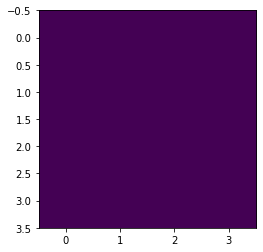

In [14]:
dft(response5,1)

Testing the same array (response5, run1) using the numpy fft function

[[-1  1 -1  1]
 [-1  1 -1  1]
 [-1  1 -1 -1]
 [-1  1  1 -1]]
[[ -2.+0.j  -2.-4.j -10.+0.j  -2.+4.j]
 [  2.+0.j   2.+0.j  -2.+4.j  -2.-4.j]
 [ -2.+0.j   2.+0.j  -2.+0.j   2.+0.j]
 [  2.+0.j  -2.+4.j  -2.-4.j   2.+0.j]]


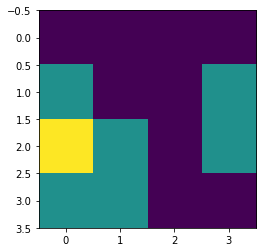

In [12]:
array=np.ndarray.reshape(response5.record[1][0],(4,4))
print(array)
array2=np.fft.fft2(array)
print(array2)

plt.imshow(np.log(np.abs(np.fft.fftshift(array2))**2))

plt.show()